# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [114]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [115]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [174]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution,g):
    var=""
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            g.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        g.add_edge(node.data,child,label=child.cost)
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        g.add_edge(node.data,child,label=child.cost)
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution,Grafo)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


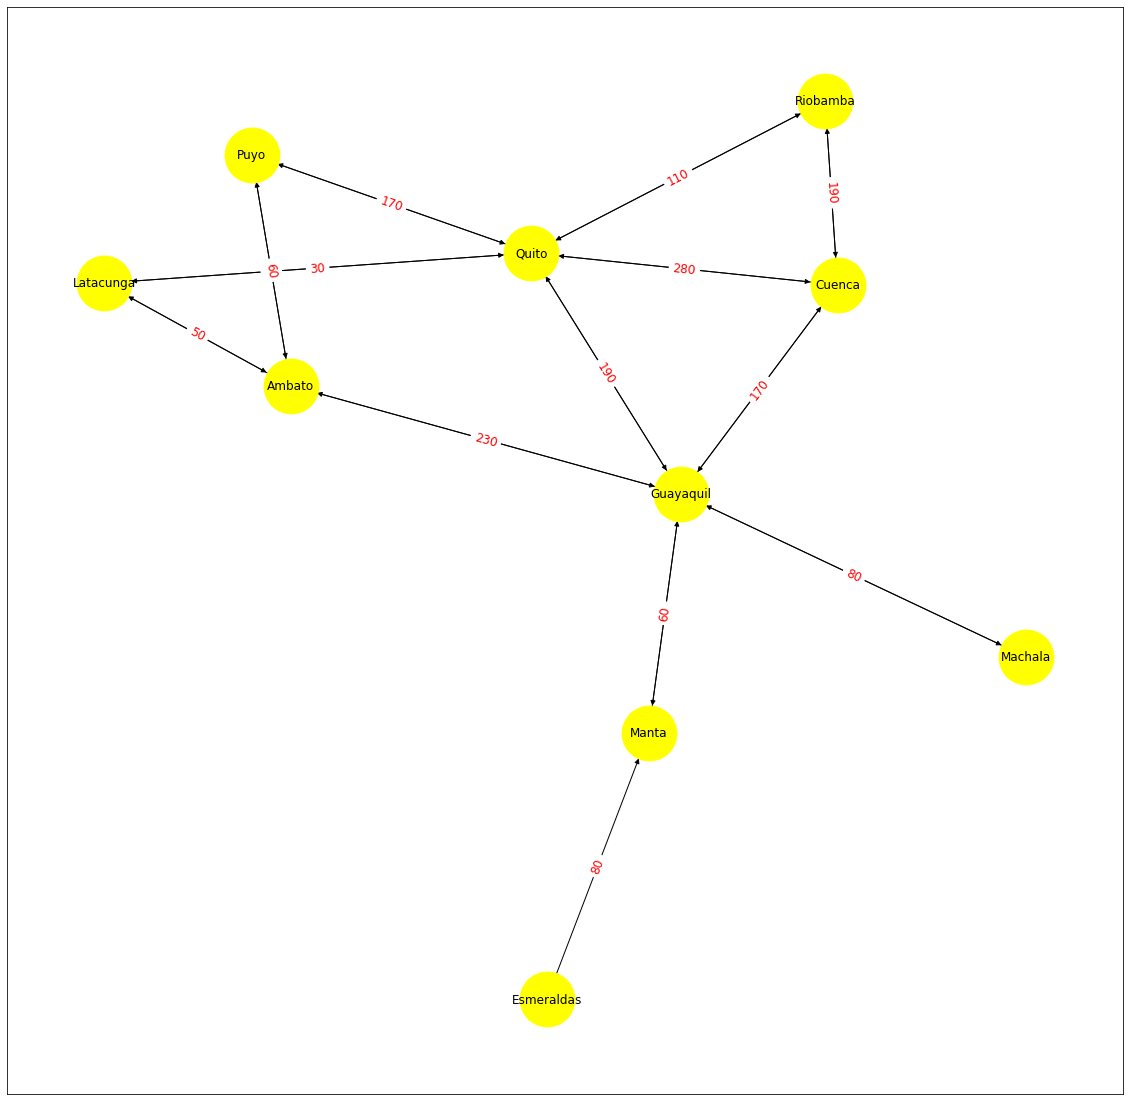

['Guayaquil', 'Ambato', 'Puyo']


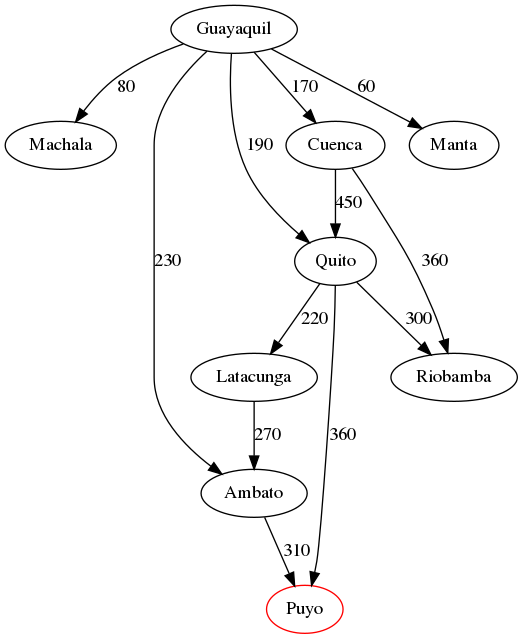

In [179]:
# Implementar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:
            graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    pos = nx.spring_layout(graf)
    plt.figure(figsize=(20,20)) 
    #print(" ")
    labels = nx.get_edge_attributes(graf,'length')
    #print(labels)
    nx.draw_networkx(graf, pos, node_color = 'yellow', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(graf,pos,edge_labels=labels,font_color='red',font_size=12)
    plt.show()
    
def graficarRes(grafo):
    print(result)
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    view_pydot(p)
    
graficar(connections)
graficarRes(Grafo)

# Mapa
Imagen de las oficianas de policías con respecto a mi casa:
<img src="Policia.PNG">

['Hogar', 'P. Narcoticos', 'C.S. Policia Nacional']
Costo total: 4.2


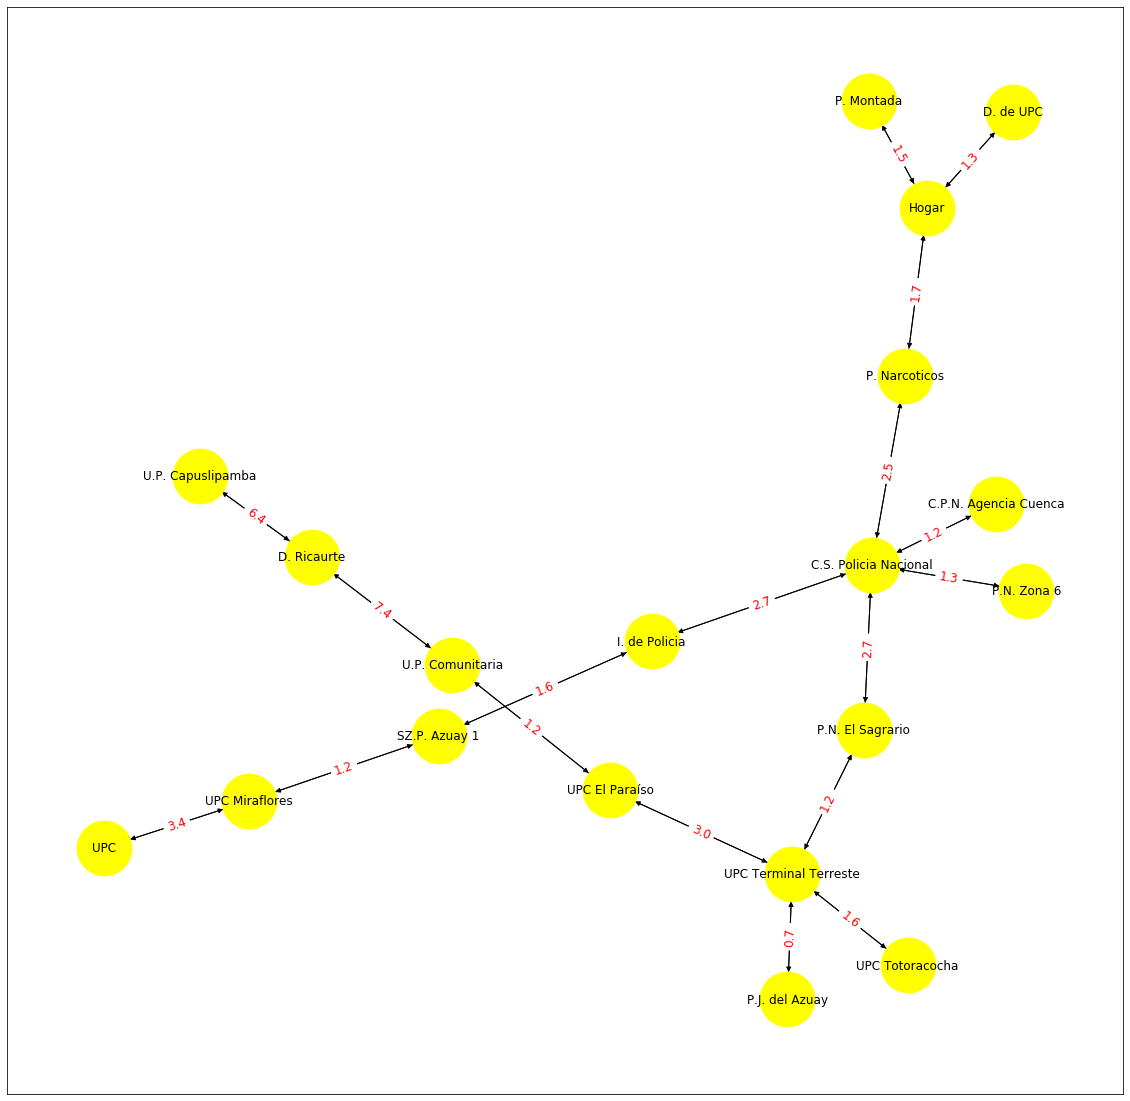

['Hogar', 'P. Narcoticos', 'C.S. Policia Nacional']


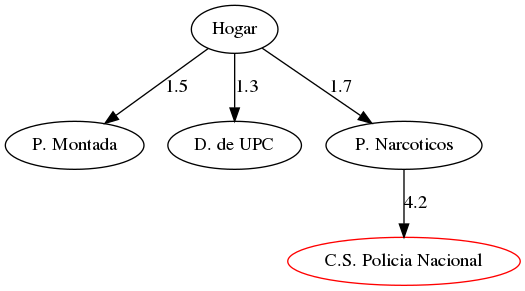

In [186]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution,g):
    var=""
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            g.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        g.add_edge(node.data,child,label=child.cost)
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        g.add_edge(node.data,child,label=child.cost)
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    policia= {
        'Hogar': {'P. Montada':1.5, 'D. de UPC':1.3,'P. Narcoticos':1.7},
        'P. Montada':{'Hogar':1.5},
        'D. de UPC':{'Hogar':1.3},
        'P. Narcoticos': {'C.S. Policia Nacional':2.5, 'Hogar':1.7},
        'C.S. Policia Nacional': {'C.P.N. Agencia Cuenca':1.2,'P.N. Zona 6':1.3,'I. de Policia':2.7,'P.N. El Sagrario':2.7,'P. Narcoticos':2.5},
        'C.P.N. Agencia Cuenca': {'C.S. Policia Nacional':1.2},
        'P.N. Zona 6': {'C.S. Policia Nacional':1.3},
        'I. de Policia': {'SZ.P. Azuay 1':1.6, 'C.S. Policia Nacional':2.7},
        'P.N. El Sagrario': {'UPC Terminal Terreste':1.2,'C.S. Policia Nacional':2.7},
        'SZ.P. Azuay 1': {'UPC Miraflores':1.2, 'I. de Policia':1.6},
        'UPC Terminal Terreste': {'P.J. del Azuay':0.7,'UPC Totoracocha':1.6,'UPC El Paraíso':3.0,'P.N. El Sagrario':1.2},
        'P.J. del Azuay': {'UPC Terminal Terreste':0.7},
        'UPC Totoracocha': {'UPC Terminal Terreste':1.6},
        'UPC Miraflores': {'UPC':3.4, 'SZ.P. Azuay 1':1.2},
        'UPC': {'UPC Miraflores':3.4},
        'UPC El Paraíso':{'U.P. Comunitaria':1.2,'UPC Terminal Terreste':3.0},
        'U.P. Comunitaria':{'D. Ricaurte':7.4,'UPC El Paraíso':1.2},
        'D. Ricaurte': {'U.P. Capuslipamba':6.4,'U.P. Comunitaria':7.4},
        'U.P. Capuslipamba':{'D. Ricaurte':6.4}
    }

    init_state = 'Hogar'
    solution = 'C.S. Policia Nacional'
    solution_node = search_costo_solucion(policia, init_state, solution,Grafo)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
    graficar(policia)
    graficarRes(Grafo)

Factor de Ramificación

${n=18}$ -> total de nodos

${d=8}$ -> profundidad


$${n} = \frac{b^{d+1}-1}{b-1}$$


$${18} = \frac{b^{8+1}-1}{b-1}$$

$${18} = \frac{b^{9}-1}{b-1}$$

Al resolver esto aparte tenemos que b vale aproximadamente:


$${b} = {1.16633}$$

Rta. El factor de ramificación es igual a ${1.16633}$, para el problema.

Análisis del algoritmo

Completo: si es completo.

Óptimo:si es óptimo.

Complejidad temporal y Complejidad espacial: $${O(b^d)} = {(1.16633)^{8}}$$
$${O(b^d)} = {3.42429}$$

# Mapa
Imagen de la propagación del Coronavirus(COVID-19) por provincias en Ecuador:
<img src="Contagio.PNG">

['Guayas', 'El Oro', 'Loja']
Costo total: 268


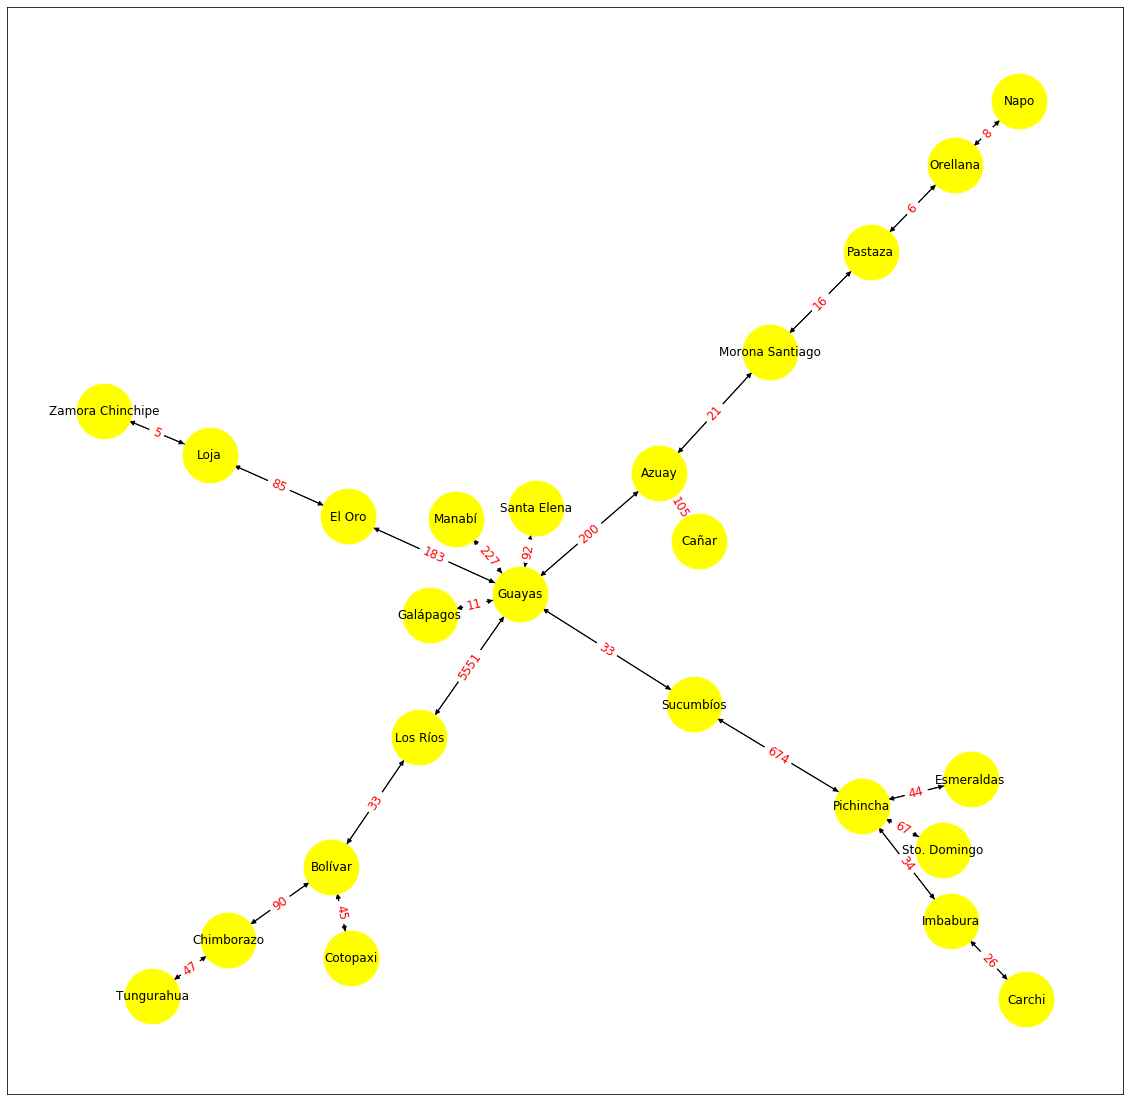

['Guayas', 'El Oro', 'Loja']


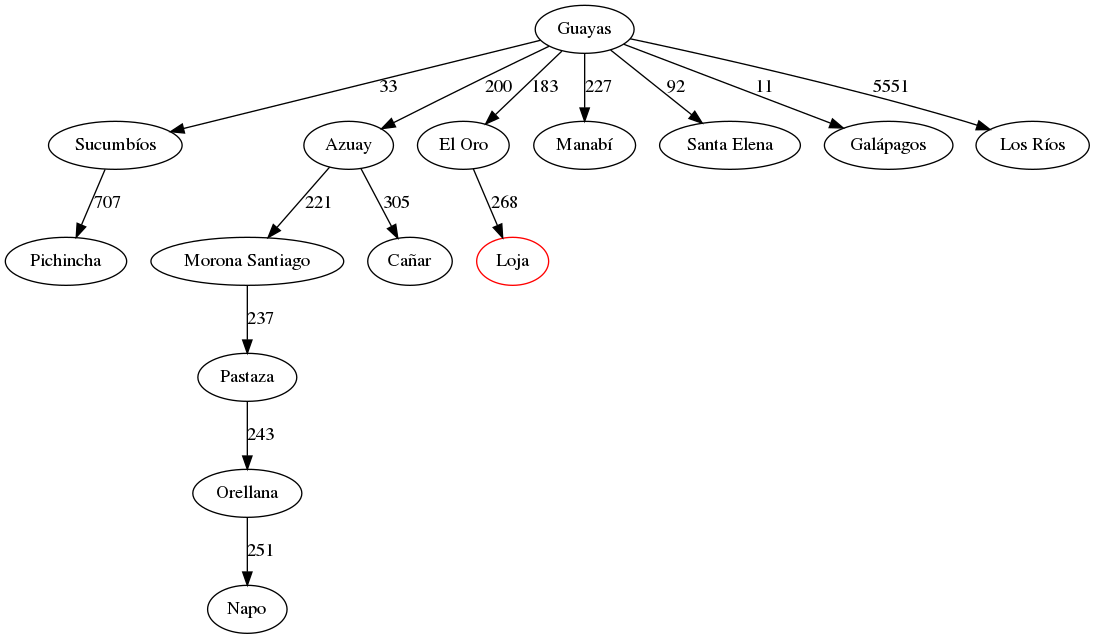

In [189]:
import networkx as nx
from IPython.display import Image, display

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution,g):
    var=""
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            g.add_node(node.data,color='red')
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        g.add_edge(node.data,child,label=child.cost)
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        g.add_edge(node.data,child,label=child.cost)
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    coronavirus={
        'Los Ríos': {'Guayas':5551, 'Bolívar':33},
        'Guayas': {'Sucumbíos':33, 'Azuay':200,'El Oro':183,'Manabí':227,'Santa Elena':92,'Galápagos':11,'Los Ríos':5551},
        'Bolívar': {'Chimborazo':90,'Cotopaxi':45,'Los Ríos':33},
        'Sucumbíos':{'Pichincha':674,'Guayas':33},
        'Azuay': {'Morona Santiago':21,'Cañar':105,'Guayas':200},
        'El Oro': {'Loja':85, 'Guayas':183},
        'Manabí': {'Guayas':227},
        'Santa Elena': {'Guayas':92},
        'Galápagos': {'Guayas':11},
        'Chimborazo': {'Tungurahua':47,'Bolívar':90},
        'Cotopaxi': {'Bolívar':45},
        'Pichincha':{'Sto. Domingo':67,'Esmeraldas':44,'Imbabura':34,'Sucumbíos':674},
        'Morona Santiago': {'Pastaza':16, 'Azuay':21},
        'Cañar': {'Azuay':105},
        'Loja': {'Zamora Chinchipe':5,'El Oro':85},
        'Tungurahua': {'Chimborazo':47},
        'Sto. Domingo': {'Pichincha':67},
        'Esmeraldas': {'Pichincha':44},
        'Imbabura': {'Carchi':26,'Pichincha':34},
        'Pastaza': {'Orellana':6, 'Morona Santiago':16},
        'Carchi': {'Imbabura':26},
        'Orellana': {'Napo':8,'Pastaza':6},
        'Napo': {'Orellana':8},
        'Zamora Chinchipe':{'Loja':5}
    }

    init_state = 'Guayas'
    solution = 'Loja'
    solution_node = search_costo_solucion(coronavirus, init_state, solution,Grafo)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
    graficar(coronavirus)
    graficarRes(Grafo)

# Conclusiones
Concluyo que el uso de este metodo tambien ayuda mucho porque encuentra el camino mas corto y nos permite analizar de mejor manera los problemas.

# Referencias

1. https://www.salud.gob.ec/gacetas-epidemiologicas-coronavirus-covid-19/
2. https://public.flourish.studio/visualisation/1631922/embed?auto=1
3. https://twitter.com/Riesgos_Ec